In [1]:
from functions import *
from set_2_functions import *

from rich.jupyter import print
from rich.markdown import Markdown

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import re

from matplotlib.pyplot import figure

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

set_two_files = [file for file in get_files("data") if 'set_2' in file]

unicast_files = [file for file in set_two_files if 'unicast' in file]
unicast_latency_files = [file for file in unicast_files if 'clean_pub_0' in file]

multicast_files = [file for file in set_two_files if 'multicast' in file]
multicast_latency_files = [file for file in multicast_files if 'clean_pub_0' in file]

# Set 2: Participant Measure Analysis
Measuring the performance of DDS whilst increasing the amount of participants.

There are 4 tests for each communication type (`unicast` and `multicast`):
1. 10 Publishers + 10 Subscribers
2. 25 Publishers + 25 Subscribers
3. 50 Publishers + 50 Subscribers
4. 100 Publishers + 100 Subscribers

Here is the configuration used in each test:

|       Parameter      |         Value         |
|:--------------------:|:---------------------:|
|      Data Length     |       100 Bytes       |
|     Test Duration    |      900 Seconds      |
|       Test Type      |      `throughput`     |
|     Latency Count    |          1000         |
|      Reliability     |       `reliable`      |
| Communication Method | `unicast` `multicast` |
| Transport            | `UDPv4`               |

## Summary of Latency Data

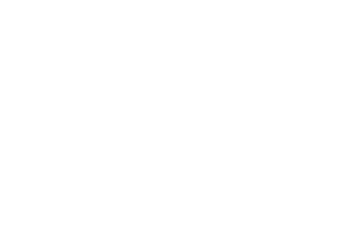

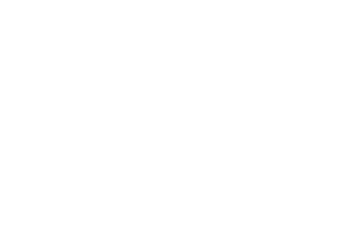

In [2]:
# You have to run this in a python execution environment to see the outcome.

plot_latency_summary_table(unicast_latency_files)
plot_latency_summary_table(multicast_latency_files)

## Latency Plots per Participant Amount

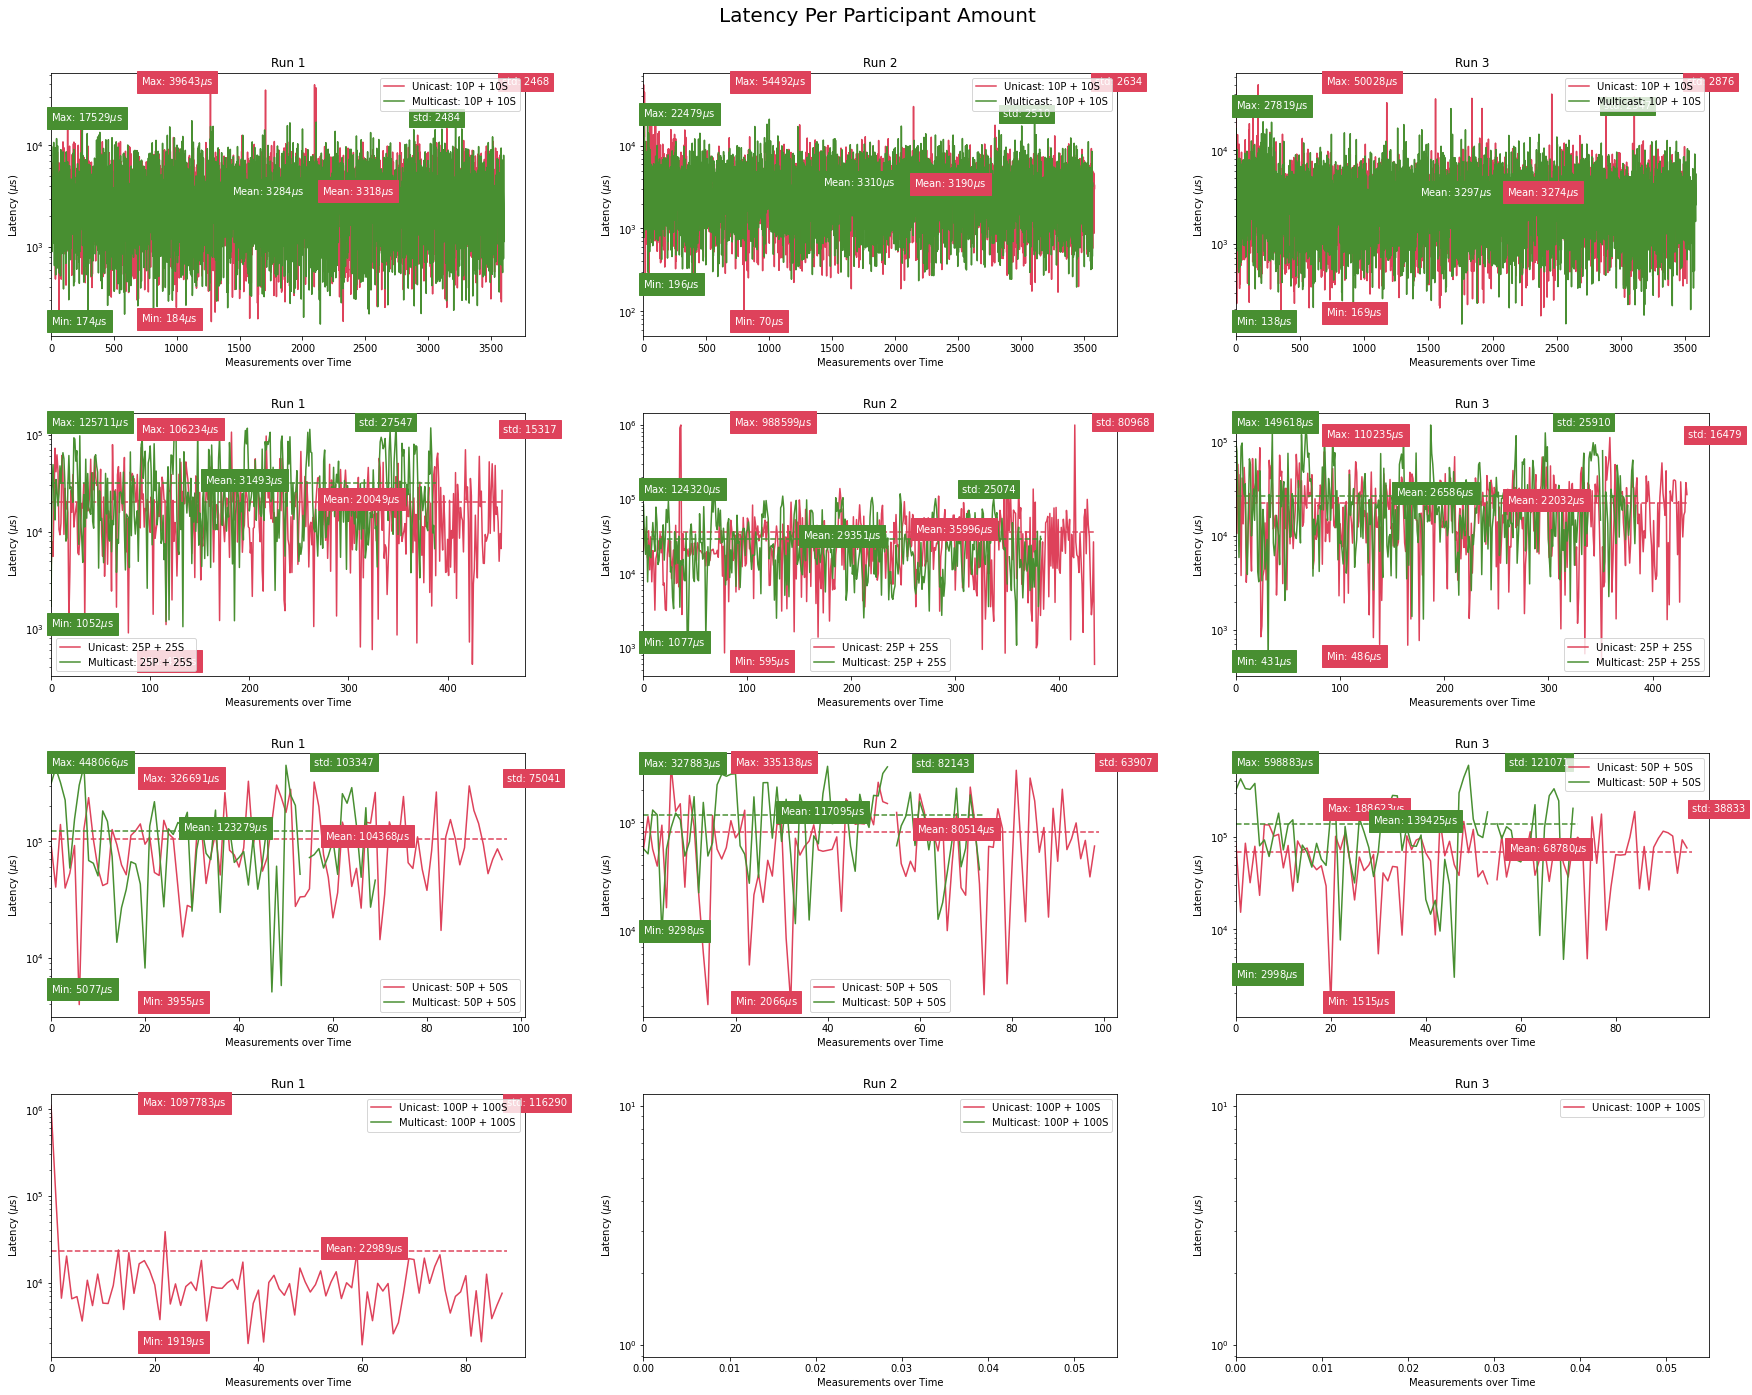

In [3]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(25, 20))
fig.suptitle("Latency Per Participant Amount", fontsize=20)

for file in unicast_latency_files:
    c = '#de425b'
    s = 5
    if 'run_1' in file:
        title = "Run 1"
        plot_data(title, file, 0, axes, c)
    elif 'run_2' in file:
        title = "Run 2"
        plot_data(title, file, 1, axes, c)
    elif 'run_3' in file:
        title = "Run 3"
        plot_data(title, file, 2, axes, c)

for file in multicast_latency_files:
    c = '#488f31'
    s = 5
    if 'run_1' in file:
        title = "Run 1"
        plot_data(title, file, 0, axes, c)
    elif 'run_2' in file:
        title = "Run 2"
        plot_data(title, file, 1, axes, c)
    elif 'run_3' in file:
        title = "Run 3"
        plot_data(title, file, 2, axes, c)
        
fig.tight_layout(pad=3)

## Latency CDFs Per Participant Amount

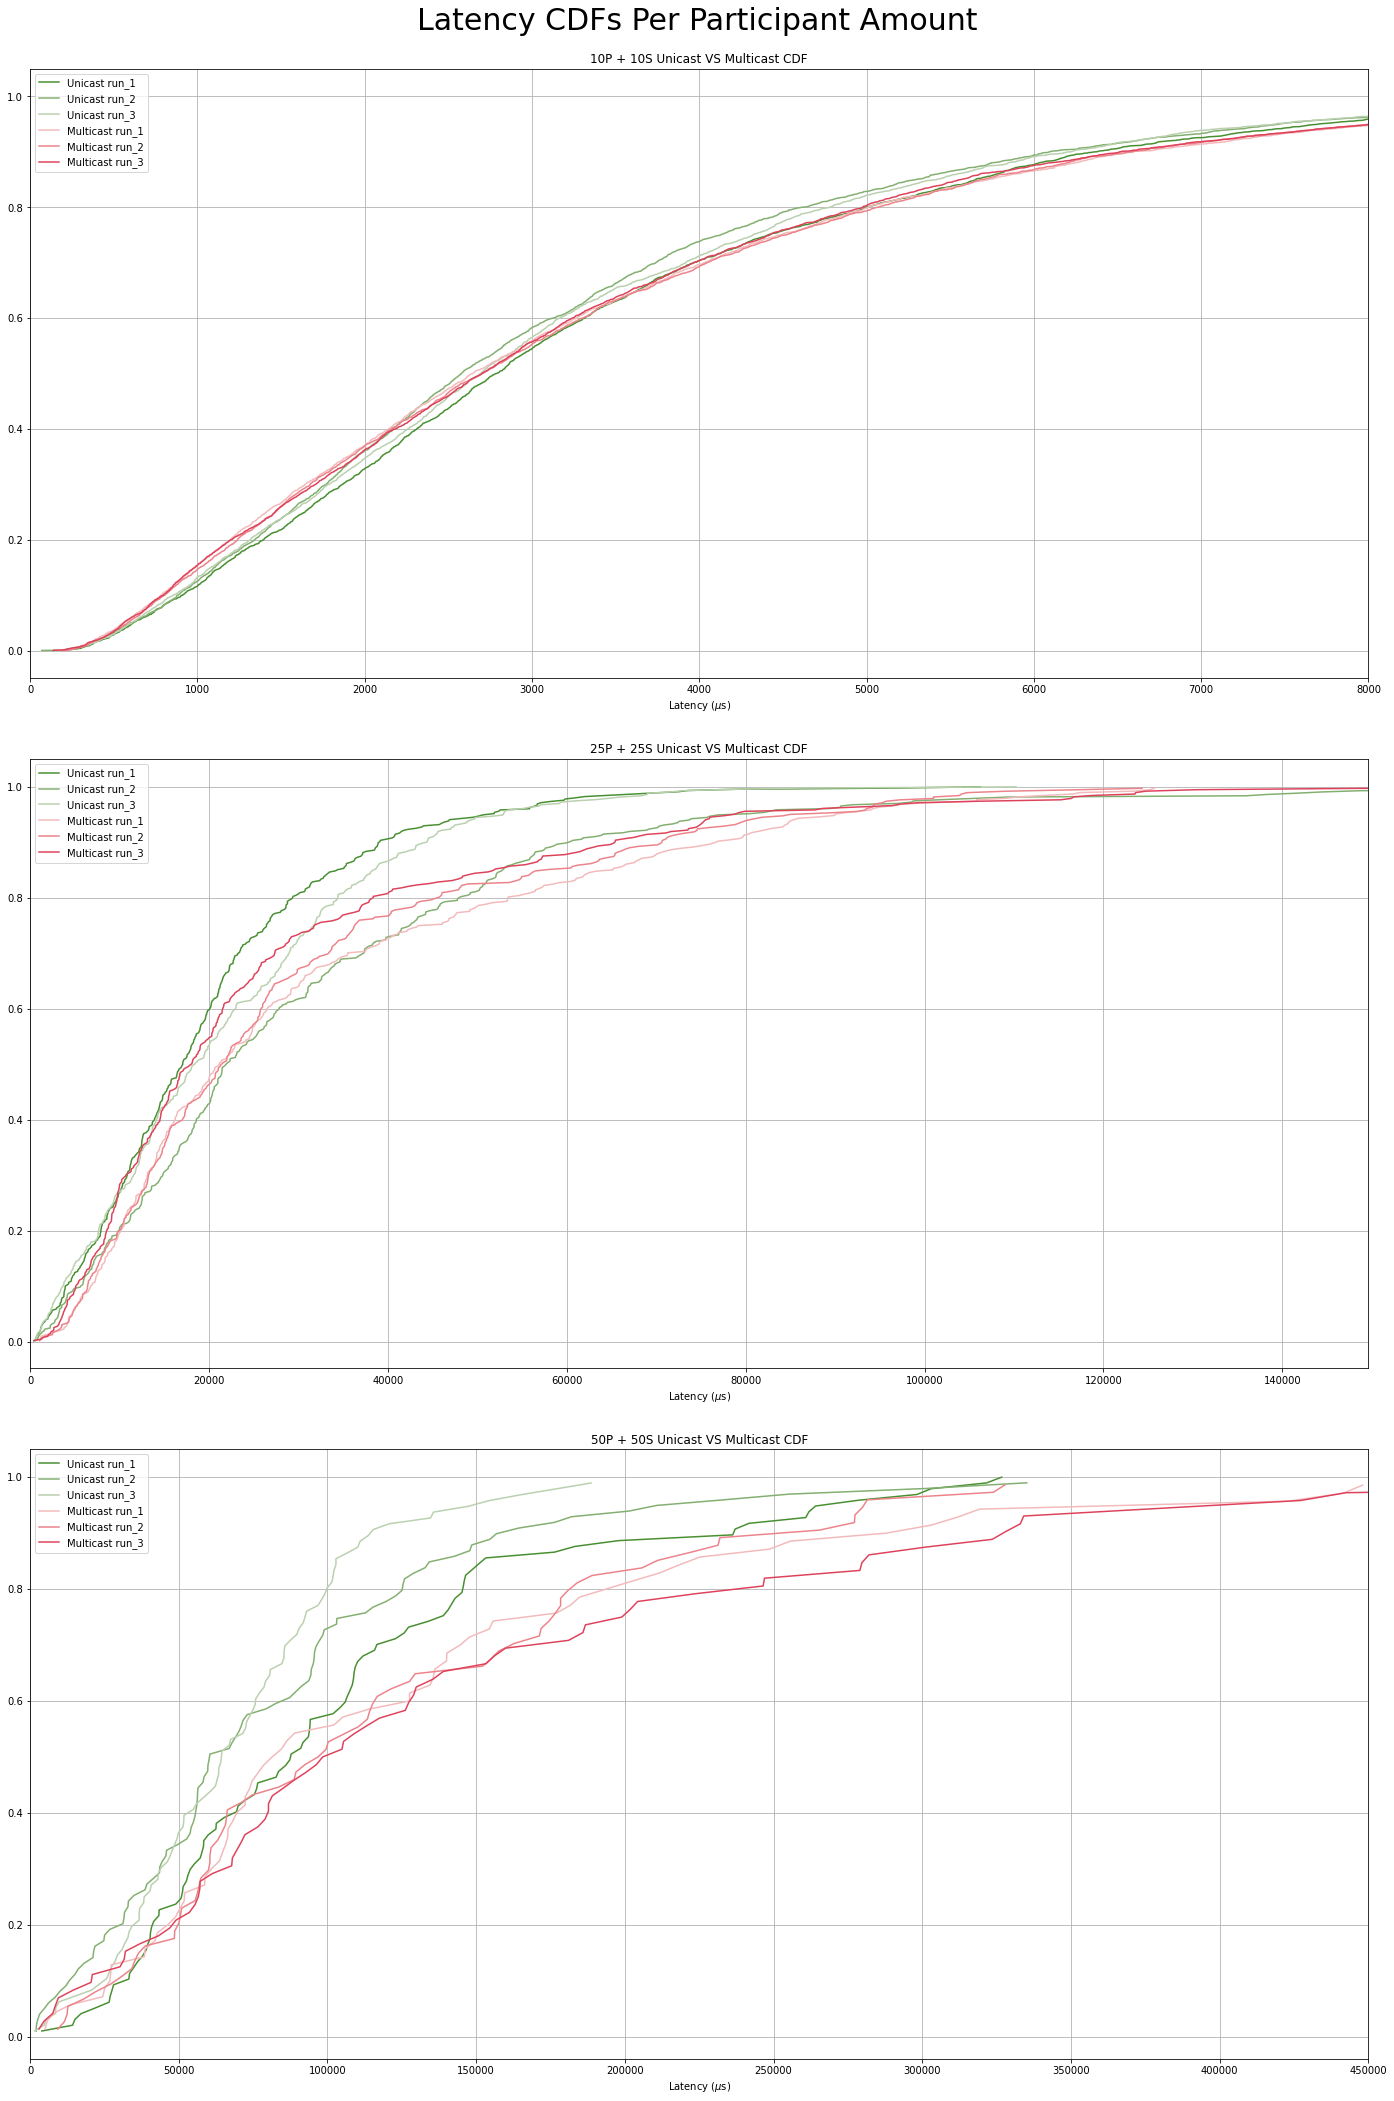

In [4]:

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(20, 30))
fig.suptitle("Latency CDFs Per Participant Amount", fontsize=30)

plot_latency_cdf_per_amount(unicast_latency_files, multicast_latency_files, axes)

axes[0].set_title("10P + 10S Unicast VS Multicast CDF")
axes[1].set_title("25P + 25S Unicast VS Multicast CDF")
axes[2].set_title("50P + 50S Unicast VS Multicast CDF")

fig.tight_layout(pad = 3)

## Summary of Throughput Data

In [5]:
unicast_throughput_files = [file for file in unicast_files if 'clean_sub' in file]
multicast_throughput_files = [file for file in multicast_files if 'clean_sub' in file]

unicast_1_throughput_files = [file for file in unicast_throughput_files if 'unicast_1' in file]
unicast_2_throughput_files = [file for file in unicast_throughput_files if 'unicast_2' in file]
unicast_3_throughput_files = [file for file in unicast_throughput_files if 'unicast_3' in file]
unicast_4_throughput_files = [file for file in unicast_throughput_files if 'unicast_4' in file]

multicast_1_throughput_files = [file for file in multicast_throughput_files if 'multicast_1' in file]
multicast_2_throughput_files = [file for file in multicast_throughput_files if 'multicast_2' in file]
multicast_3_throughput_files = [file for file in multicast_throughput_files if 'multicast_3' in file]
multicast_4_throughput_files = [file for file in multicast_throughput_files if 'multicast_4' in file]

# plot_throughput_summary_tables(unicast_1_throughput_files, unicast_2_throughput_files, unicast_3_throughput_files, unicast_4_throughput_files, multicast_1_throughput_files, multicast_2_throughput_files, multicast_3_throughput_files, multicast_4_throughput_files)

## Throughput Per Participant Amount

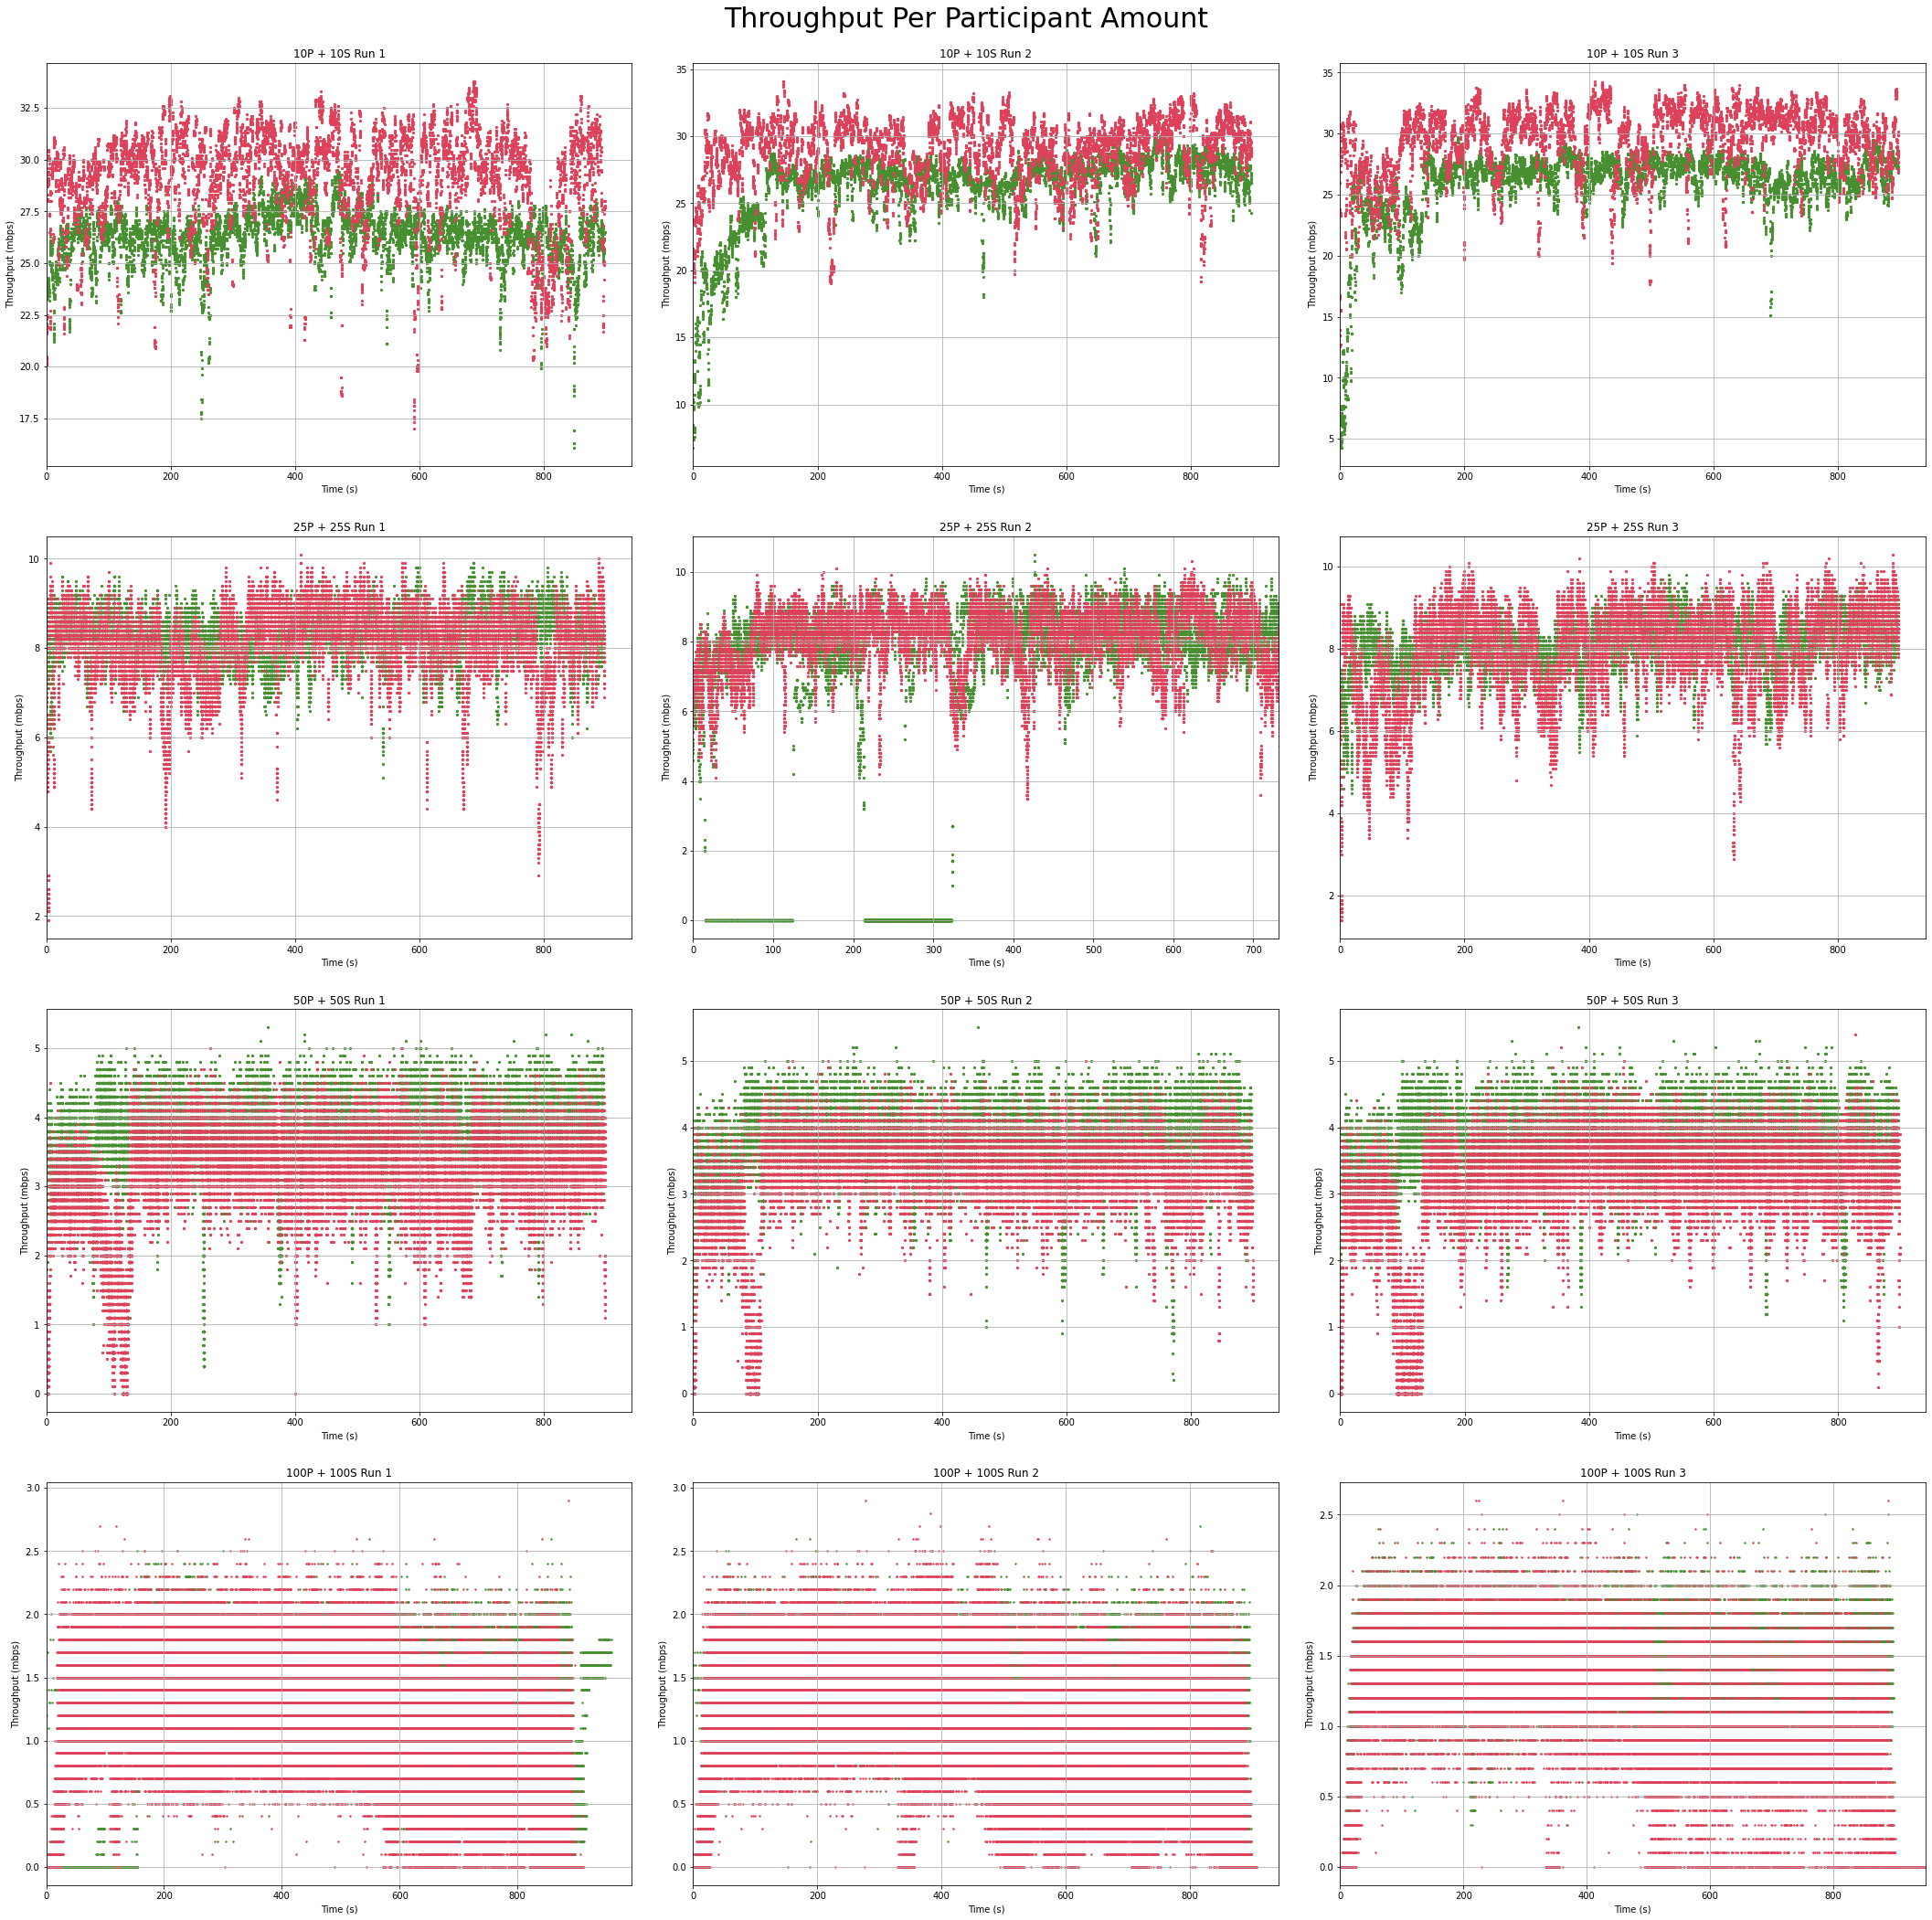

In [6]:
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))
figure.suptitle("Throughput Per Participant Amount", fontsize=30)

plot_throughput_test(unicast_1_throughput_files, "unicast", "10P + 10S", axes)
plot_throughput_test(multicast_1_throughput_files, "multicast", "10P + 10S", axes)

plot_throughput_test(unicast_2_throughput_files, "unicast", "25P + 25S", axes)
plot_throughput_test(multicast_2_throughput_files, "multicast", "25P + 25S", axes)

plot_throughput_test(unicast_3_throughput_files, "unicast", "50P + 50S", axes)
plot_throughput_test(multicast_3_throughput_files, "multicast", "50P + 50S", axes)

plot_throughput_test(unicast_4_throughput_files, "unicast", "100P + 100S", axes)
plot_throughput_test(multicast_4_throughput_files, "multicast", "100P + 100S", axes)

for i in range(0, 4):
    for j in range(0, 3):
        index = (i, j)
        axes[index].grid()

plt.tight_layout(pad=3)

## Throughput CDF Per Participant Amount

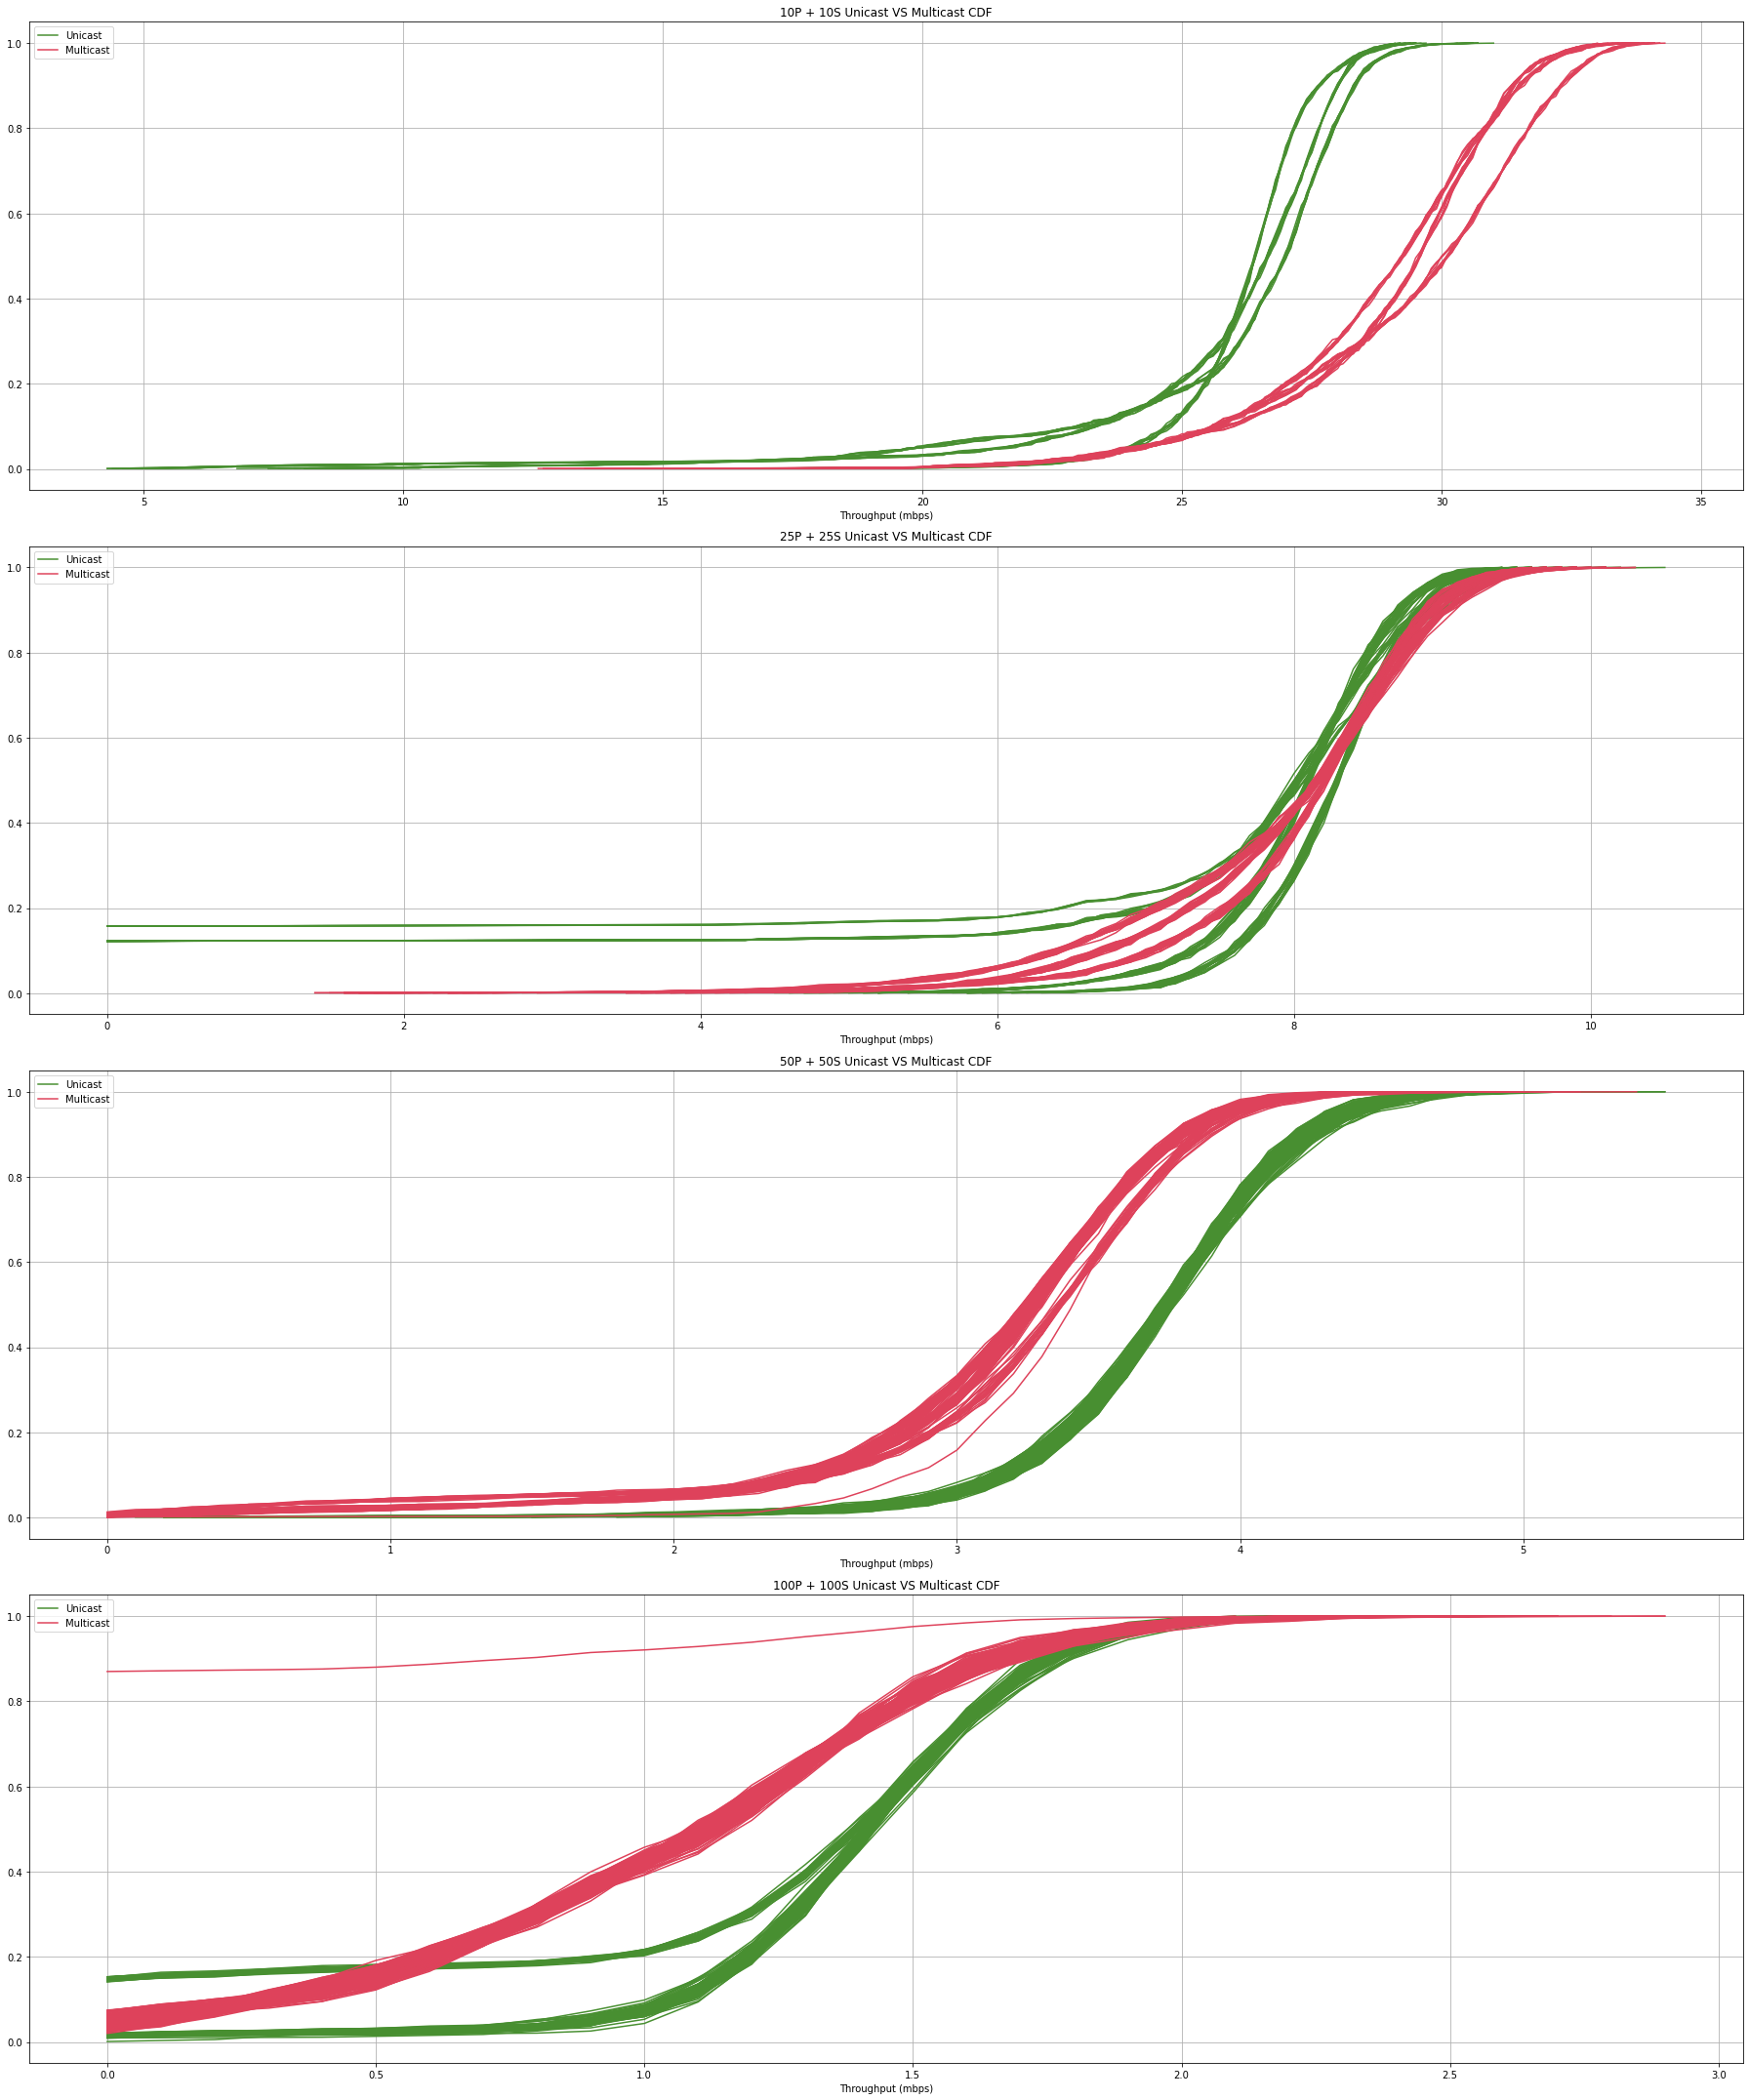

In [7]:
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(25, 30))

"""
4 Graphs (Unicast/Multicast):
1. 10P + 10S
2. 25P + 25S
3. 50P + 50S
4. 100P + 100S
"""

plot_tests_cdfs(axes, unicast_1_throughput_files, unicast_2_throughput_files, unicast_3_throughput_files, unicast_4_throughput_files, multicast_1_throughput_files, multicast_2_throughput_files, multicast_3_throughput_files, multicast_4_throughput_files)

plt.tight_layout()

## Sample Rate Per Participant Amount

In [8]:
# r_n = run n
r_1_files = []
r_2_files = []
r_3_files = []

for file in unicast_1_throughput_files:
    if 'run_1' in file:
        r_1_files.append(file)
    elif 'run_2' in file:
        r_2_files.append(file)
    else:
        r_3_files.append(file)

for i in range(0, len(r_1_files)):
    r_1_file = r_1_files[i]
    r_2_file = r_2_files[i]
    r_3_file = r_3_files[i]
    # Check files have same name
    if os.path.basename(r_1_file) == os.path.basename(r_2_file) == os.path.basename(r_3_file):
        curr_files = [r_1_file, r_2_file, r_3_file]
        series_1 = pd.read_csv(r_1_file)["Throughput"]
        series_2 = pd.read_csv(r_2_file)["Throughput"]
        series_3 = pd.read_csv(r_3_file)["Throughput"]

        data = {'run_1': series_1, 'run_2': series_2, 'run_3': series_3}

        df = pd.DataFrame(data=data)

        df['avg_run'] = df.mean(numeric_only=True, axis=1)


In [18]:
from functions import *

"""

    For each test:
        - Get folder containing runs
        - Create average_latency file containing latencies of each run as well as average run latency
        - Create average_throughput file per sub containing throughput of each run as well as average run throughput

"""
def get_test_folders(root_dir):
    """
        Gets the list of test folders containing multiple runs.

        Parameters:
            root_dir (string): root directory of all folders and subfolders

        Returns:
            test_folders (list): list of all test folders

    """
    test_folders = []
    for file in get_files(root_dir):
        test_folders.append(file.split("run_")[0][0:-1])
    test_folders = list(set(test_folders))
    test_folders.sort()
    test_folders = list(filter(lambda f: '.' not in f, test_folders))

    return test_folders

# Get test folders
test_folders = get_test_folders('data')

for test in test_folders:
    # For each run read in the latency values
    test_files = get_files(test)
    latency_files = [file for file in test_files if 'clean_pub_0' in file]
    
    data = {}

    for file in latency_files:
        series = pd.read_csv(file)["Latency"]
        column = {os.path.basename(os.path.dirname(file)) + "_latency" : series}
        data.update(column)        

    df = pd.DataFrame(data=data)
    df['avg_run_latency'] = df.mean(numeric_only=True, axis=1)

    # Create new .csv file in test_folder:
    df.to_csv(os.path.join(test, 'average_latencies.csv'))
